In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# 結果表示用関数
def plot_decision_boundary(classifier, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    ret = classifier.predict(X_hypo)
    if isinstance(ret, tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)
    

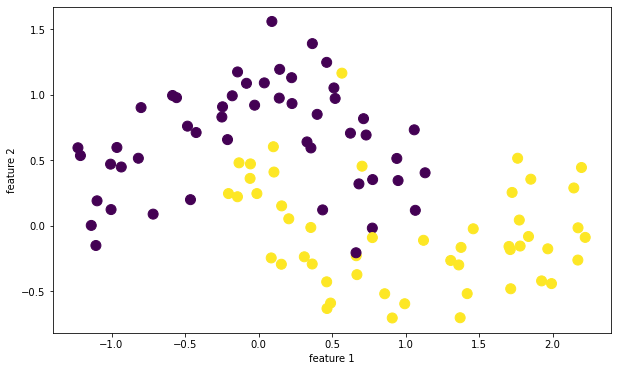

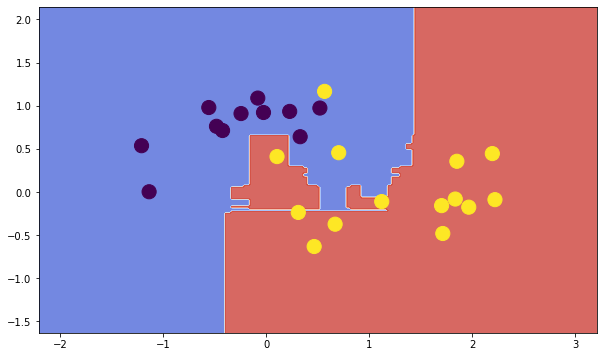

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# 渦巻状のデータを作る。
X, y = make_moons(n_samples=100, noise=0.25)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2');

X_train, X_test, y_train, y_test = train_test_split(X, y)

forest = RandomForestClassifier(n_estimators=10, random_state=200)

forest.fit(X_train, y_train)
forest.score(X_test, y_test)

plt.figure(figsize=(10, 6))
plot_decision_boundary(forest, X_test, y_test)